# Fraud Check - Random Forest

Use random forest to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not

Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


So, we are going to start with importing libraries and loading data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Fraud_check.csv')

In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

Hence there is no null values present in the data set

We need to transform the data a little. We have to check if a person could commit fraud using the features like Undergrad, Martial.Status, Work.Experience, and Urban.

Also, we have to encode Taxable.Income column to set the labels for classification as Risky and Good.

First, let us move the output column to the end of the dataset.

In [7]:
temp_cols = df.columns.tolist()
temp_cols

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [8]:
index = df.columns.get_loc('Taxable.Income')

In [9]:
new_cols = temp_cols[0:index] + temp_cols[index +1 :] +temp_cols[index:index+1]
new_cols

['Undergrad',
 'Marital.Status',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Taxable.Income']

In [10]:
df = df[new_cols]

In [11]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,68833
1,YES,Divorced,134075,18,YES,33700
2,NO,Married,160205,30,YES,36925
3,YES,Single,193264,15,YES,50190
4,NO,Married,27533,28,NO,81002


In [12]:
df.count()

Undergrad          600
Marital.Status     600
City.Population    600
Work.Experience    600
Urban              600
Taxable.Income     600
dtype: int64

In [13]:
df.describe()

,City.Population,Work.Experience,Taxable.Income
count,600.000000,600.000000,600.000000
mean,108747.368333,15.558333,55208.375000
std,49850.075134,8.842147,26204.827597
min,25779.000000,0.000000,10003.000000
25%,66966.750000,8.000000,32871.500000
50%,106493.500000,15.000000,55074.500000
75%,150114.250000,24.000000,78611.750000
max,199778.000000,30.000000,99619.000000


In [14]:
df['Taxable.Income']=pd.cut(df['Taxable.Income'], bins = [0,30000,100000], labels = ['Risky','Good'])

In [15]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [16]:
df['Taxable.Income'].value_counts()

Taxable.Income
Good     476
Risky    124
Name: count, dtype: int64

In [17]:
from sklearn import preprocessing

In [18]:
label_encoder = preprocessing.LabelEncoder()
df['Taxable.Income']=label_encoder.fit_transform(df['Taxable.Income'])

In [19]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,NO,Single,50047,10,YES,0
1,YES,Divorced,134075,18,YES,0
2,NO,Married,160205,30,YES,0
3,YES,Single,193264,15,YES,0
4,NO,Married,27533,28,NO,0


Here, it has encoded good as 0 and risky as 1

# EDA 
let us do some EDA analysis!


<Axes: xlabel='Marital.Status', ylabel='count'>

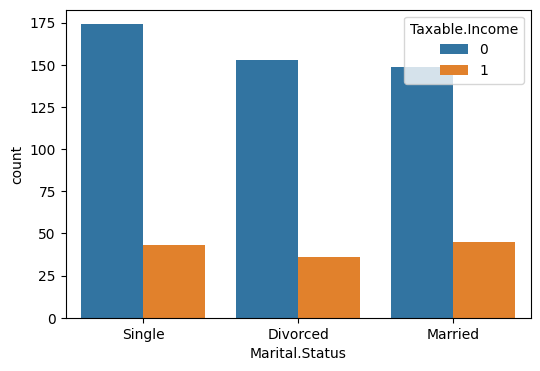

In [20]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Marital.Status', hue = 'Taxable.Income', data = df)

<Axes: xlabel='Undergrad', ylabel='count'>

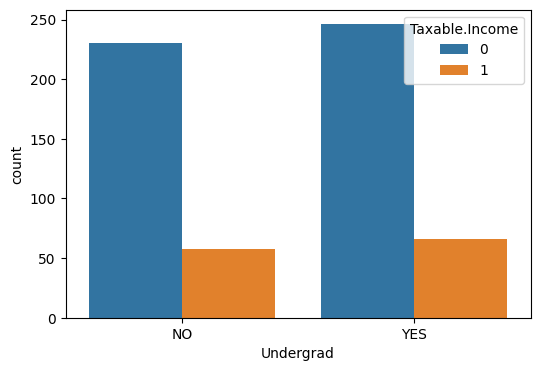

In [21]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Undergrad', hue = 'Taxable.Income', data = df)

<Axes: xlabel='Urban', ylabel='count'>

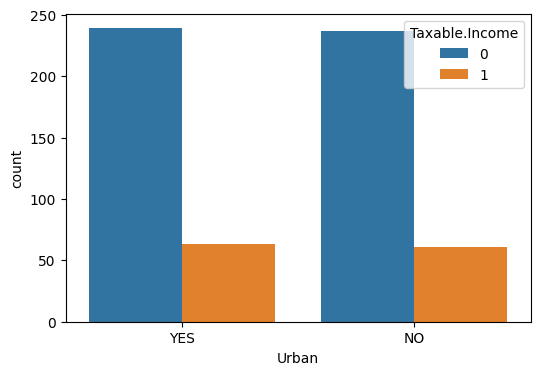

In [22]:
plt.figure(figsize = (6,4))
sns.countplot(x = 'Urban', hue = 'Taxable.Income', data = df)

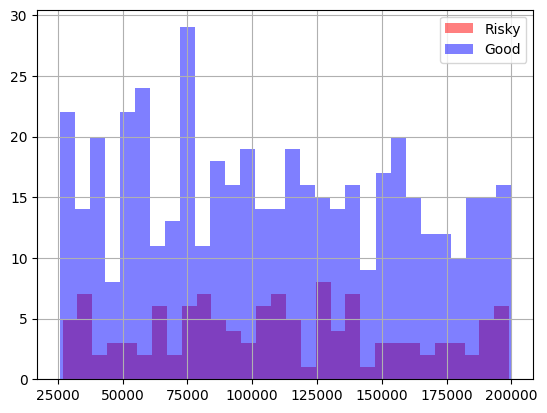

In [23]:
df[df['Taxable.Income']==1]['City.Population'].hist(alpha = 0.5, bins = 30, color = 'red', label = 'Risky')
df[df['Taxable.Income']==0]['City.Population'].hist(alpha = 0.5, bins = 30, color = 'blue', label = 'Good')
plt.legend()
plt.show()

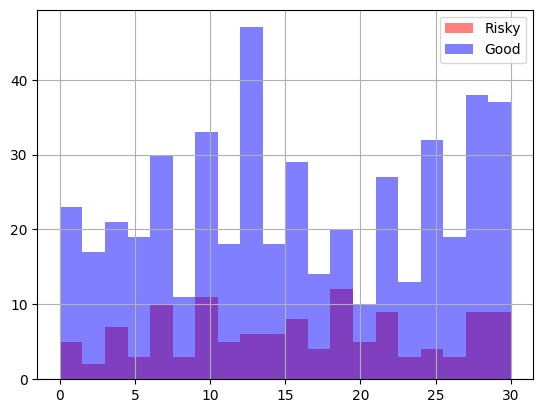

In [24]:
df[df['Taxable.Income']==1]['Work.Experience'].hist(alpha = 0.5, bins = 20, color = 'red', label = 'Risky')
df[df['Taxable.Income']==0]['Work.Experience'].hist(alpha = 0.5, bins = 20, color = 'blue', label = 'Good')
plt.legend()
plt.show()


We also need to transform other columns so as to be able to process them through the decision tree.

So, here we can either encode them, or us dummy variables. 
I prefer to go with encoding

In [25]:
le = preprocessing.LabelEncoder()
le.fit(['NO','YES'])

LabelEncoder()

In [26]:
df['Undergrad']=le.transform(df['Undergrad'])
df['Urban'] = le.transform(df['Urban'])

In [27]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,Single,50047,10,1,0
1,1,Divorced,134075,18,1,0
2,0,Married,160205,30,1,0
3,1,Single,193264,15,1,0
4,0,Married,27533,28,0,0


In [28]:
le1 = preprocessing.LabelEncoder()
le1.fit(['Single','Married','Divorced'])

LabelEncoder()

In [29]:
df['Marital.Status'] = le1.transform(df['Marital.Status'])

In [30]:
df.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Taxable.Income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Here, Divorced is encoded as 0, Married is encoded as 1 and Single is encoded as 2. (alphabatically)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x = df.iloc[:,0:5]
y = df['Taxable.Income']

In [33]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40, stratify = y)

In [34]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
175,1,2,57055,13,0
506,0,2,111105,8,1
172,0,1,52819,23,1
60,1,1,91138,23,0
595,1,0,39492,7,1
...,...,...,...,...,...
456,0,2,53788,23,1
37,0,1,66912,5,1
21,1,0,29106,7,1
539,1,0,57390,8,0


In [35]:
y_train

175    0
506    1
172    1
60     0
595    0
      ..
456    0
37     0
21     1
539    0
153    1
Name: Taxable.Income, Length: 480, dtype: int32

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
model = RandomForestClassifier(n_estimators = 100)
model.fit(x_train, y_train)

RandomForestClassifier()

In [41]:
pred = model.predict(x_test)

In [42]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
np.mean(pred == y_test)

0.7666666666666667

In [44]:
from sklearn.metrics import classification_report

In [45]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        95
           1       0.00      0.00      0.00        25

    accuracy                           0.77       120
   macro avg       0.39      0.48      0.43       120
weighted avg       0.62      0.77      0.69       120



So, here we have only 77% accuracy! Which is quite low.

In [46]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [47]:
fi

,feature,importance
2,City.Population,0.550501
3,Work.Experience,0.312776
1,Marital.Status,0.067806
0,Undergrad,0.034849
4,Urban,0.034067


# Alternate Model

In [50]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}
from sklearn.model_selection import GridSearchCV
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(x, y)

print('Best Score',grid_search.best_score_)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
Best Score 0.7933333333333333


In [51]:

rf_best = grid_search.best_estimator_
print(rf_best)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)


In [52]:
model = RandomForestClassifier(max_depth = 2, min_samples_leaf = 5, n_estimators = 10, n_jobs = -1, random_state = 42)

In [53]:
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [56]:
pred = model.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [57]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        95
           1       0.00      0.00      0.00        25

    accuracy                           0.79       120
   macro avg       0.40      0.50      0.44       120
weighted avg       0.63      0.79      0.70       120



C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
print(confusion_matrix(y_test, pred))

[[95  0]
 [25  0]]


Here, all the predictions are of 0, which is not good. let's try using SMOTE by having a balanced dataset to work upon.

# Imbalanced data analysis

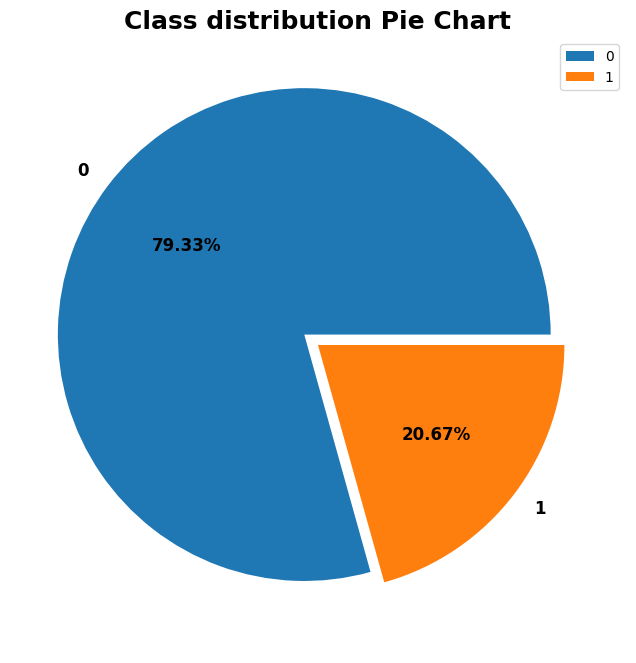

In [60]:
plt.figure(figsize = (12,8))
plt.pie(df['Taxable.Income'].value_counts(),
        labels = df['Taxable.Income'].unique(),
        explode = [0.07,0.0],
        autopct = '%.2f%%',
        textprops = {'size':'large',
                     'fontweight':'bold',
                     'rotation': 0,
                     'color':'k'})
plt.legend(loc = 'upper right')
plt.title('Class distribution Pie Chart', fontsize = 18, fontweight = 'bold')
plt.show()

The data is clearly imbalanced!

In [61]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [62]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 381, 1: 99})
After Counter({0: 381, 1: 381})


In [63]:
model.fit(x_train_sm, y_train_sm)

RandomForestClassifier(max_depth=2, min_samples_leaf=5, n_estimators=10,
                       n_jobs=-1, random_state=42)

In [64]:
pred = model.predict(x_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [65]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.65      0.72        95
           1       0.21      0.36      0.27        25

    accuracy                           0.59       120
   macro avg       0.50      0.51      0.49       120
weighted avg       0.67      0.59      0.62       120



In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
print(confusion_matrix(y_test, pred))

[[62 33]
 [16  9]]


Even after balancing the results are still not good!

# End of assignment